[![Binder](https://mybinder.org/badge_logo.svg)](https://github.com/Sistemas-Multimedia/MRVC/blob/master/src/image_IPP.ipynb)

# RD performance in IPP video coding
This notebook runs two different IPP... experiments.

The first one, implemented in `image_IPP.py` is a simple IPP... video codec without RDO (all macro-blocks are motion compensated as P-type blocks). The lossy image compressor is MP4 used in intra mode.

The second one, implemented in `image_IPP_quantized_residue.py` is a modification of `image_IPP.py` where the prediction-error images are quantized before they are compressed with MP4. Each macro-block is quantized to contribute with the same slope to the reconstructed macro-block. 

Finally, the RD curves are compared to MP4 (intra-mode).

### Sequence to compress

In [1]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

bus_cif.y4m exists.
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml

### Number of frames to compress

In [3]:
N_frames = 3 # Min val 3

## Testing `image_IPP`

### Select `image_IPP` in `RD_curve.py`

In [4]:
!sed -z -i 's/\n#import image_IPP as codec\n/\nimport image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [5]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	import image_IPP as codec
    13	#import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	#import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


### We use MP4 and therefore, no previous spatial transform is used
MP4 uses the DCT.

In [6]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [7]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


### Select the color transform

In [8]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [9]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


### Run the codec

In [10]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.802390221661055 KBPS: 7320.88 Average AMSE: 43.83927491056397
     2	Q_step: 24 BPP: 0.6891045875420876 KBPS: 6287.28 Average AMSE: 64.71079501613356
     3	Q_step: 27 BPP: 0.6002823372615039 KBPS: 5476.88 Average AMSE: 98.6580354324495
     4	Q_step: 30 BPP: 0.5287159792368126 KBPS: 4823.92 Average AMSE: 151.88171427819864
     5	Q_step: 33 BPP: 0.4788773148148148 KBPS: 4369.2 Average AMSE: 224.6583258803311
     6	Q_step: 36 BPP: 0.44860935746352415 KBPS: 4093.04 Average AMSE: 324.9012279917228
     7	Q_step: 39 BPP: 0.42963489057239057 KBPS: 3919.92 Average AMSE: 445.8785631926908


In [11]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP.txt

In [12]:
!cat /tmp/image_IPP.txt

0.802390221661055	43.83927491056397
0.6891045875420876	64.71079501613356
0.6002823372615039	98.6580354324495
0.5287159792368126	151.88171427819864
0.4788773148148148	224.6583258803311
0.44860935746352415	324.9012279917228
0.42963489057239057	445.8785631926908


In [13]:
RD_image_IPP = []
with open("/tmp/image_IPP.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP.append((float(rate), float(_distortion)))

## Testing `image_IPP_adaptive.py`

### Select `image_IPP_quantized_residue` in `RD_curve.py`

In [46]:
!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [47]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	#import image_IPP as codec
    13	import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	#import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


In [48]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [49]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [50]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [51]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [52]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

[image_IPP_adaptive.py:98 decide_types_0()] reconstructed_V_k 256 -81
[image_IPP_adaptive.py:98 decide_types_0()] reconstructed_V_k 256 -41
[image_IPP_adaptive.py:196 compute_br()] cat /tmp/original_types_???.png | gzip -9 > /tmp/image_IPP_adaptive_types.gz
[image_IPP_adaptive.py:225 compute_br()] height=288 width=352 n_channels=3 sequence_time=0.1
[image_IPP_adaptive.py:226 compute_br()] types: 332 bytes, 26.56 KBPS, 0.002911054994388328 BPP
[image_IPP_adaptive.py:98 decide_types_0()] reconstructed_V_k 256 -63
[image_IPP_adaptive.py:98 decide_types_0()] reconstructed_V_k 257 -44
[image_IPP_adaptive.py:196 compute_br()] cat /tmp/original_types_???.png | gzip -9 > /tmp/image_IPP_adaptive_types.gz
[image_IPP_adaptive.py:225 compute_br()] height=288 width=352 n_channels=3 sequence_time=0.1
[image_IPP_adaptive.py:226 compute_br()] types: 327 bytes, 26.16 KBPS, 0.0028672138047138047 BPP
[image_IPP_adaptive.py:98 decide_types_0()] reconstructed_V_k 256 -79
[image_IPP_adaptive.py:98 decide_ty

In [21]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_adaptive.txt

In [22]:
!cat /tmp/image_IPP_adaptive.txt

0.7869756593714927	582.3824957474045
0.6490600448933782	647.5335900234988
0.5645693041526375	657.120176373106
0.5079352553310886	727.9350492774971
0.47453703703703703	769.4719745195006
0.45333543771043766	847.348730359147
0.4451634399551066	988.0859385960298


In [23]:
RD_image_IPP_adaptive = []
with open("/tmp/image_IPP_adaptive.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_adaptive.append((float(rate), float(_distortion)))

## Testing `IPP_codec_quantized_residue`

### Select `image_IPP_quantized_residue` in `RD_curve.py`

In [24]:
!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_quantized_residue as codec\n/\nimport image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [25]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	#import image_IPP as codec
    13	#import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


In [26]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [27]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [28]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [29]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [30]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.6705246913580246 KBPS: 6117.76 Average AMSE: 96.58592653970258
     2	Q_step: 24 BPP: 0.6245703563411896 KBPS: 5698.48 Average AMSE: 107.32155978184623
     3	Q_step: 27 BPP: 0.5856569163860831 KBPS: 5343.4400000000005 Average AMSE: 126.03976067094557
     4	Q_step: 30 BPP: 0.5554415684624019 KBPS: 5067.76 Average AMSE: 152.5182247825477
     5	Q_step: 33 BPP: 0.5343627244668911 KBPS: 4875.44 Average AMSE: 186.15681335928733
     6	Q_step: 36 BPP: 0.5203160072951739 KBPS: 4747.280000000001 Average AMSE: 226.2572337962963
     7	Q_step: 39 BPP: 0.5110655162738497 KBPS: 4662.88 Average AMSE: 275.4683444689955


In [31]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_quantized_residue.txt

In [32]:
!cat /tmp/image_IPP_quantized_residue.txt

0.6705246913580246	96.58592653970258
0.6245703563411896	107.32155978184623
0.5856569163860831	126.03976067094557
0.5554415684624019	152.5182247825477
0.5343627244668911	186.15681335928733
0.5203160072951739	226.2572337962963
0.5110655162738497	275.4683444689955


In [33]:
RD_image_IPP_QR = []
with open("/tmp/image_IPP_quantized_residue.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_QR.append((float(rate), float(_distortion)))

## Testing MP4

### Select `MP4` in `RD_curve.py`

In [34]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as codec\n/\nimport MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [35]:
!grep import RD_curve.py

#import debug
import config
import distortion
import image_3 as frame
#import image_interpolated_IPP as codec
#import image_IPP as codec
#import image_IPP_adaptive as codec
#import image_IPP_quantized_prediction as codec
#import image_IPP_quantized_residue as codec
import MP4 as codec
#import IPP_compressor as codec
import logging
import argparse


In [36]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [37]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [38]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [39]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [40]:
!python RD_curve.py --N_frames=$N_frames 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid -

[libx264 @ 0x55c9513d08c0] frame I:1     Avg QP:29.81  size: 13890
[libx264 @ 0x55c9513d08c0] frame P:2     Avg QP:31.17  size:  2314
[libx264 @ 0x55c9513d08c0] mb I  I16..4:  2.0% 59.1% 38.9%
[libx264 @ 0x55c9513d08c0] mb P  I16..4:  0.1%  0.5%  0.5%  P16..4: 36.1% 22.1% 11.2%  0.0%  0.0%    skip:29.4%
[libx264 @ 0x55c9513d08c0] 8x8 transform intra:58.8% inter:52.6%
[libx264 @ 0x55c9513d08c0] coded y,uvDC,uvAC intra: 92.8% 78.8% 47.4% inter: 25.6% 11.6% 1.3%
[libx264 @ 0x55c9513d08c0] i16 v,h,dc,p: 22% 56%  0% 22%
[libx264 @ 0x55c9513d08c0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 18% 18% 20%  5%  6%  7%  8%  7% 11%
[libx264 @ 0x55c9513d08c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 26% 31%  9%  5%  6%  5%  6%  5%  6%
[libx264 @ 0x55c9513d08c0] i8c dc,h,v,p: 56% 20% 18%  6%
[libx264 @ 0x55c9513d08c0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55c9513d08c0] ref P L0: 84.6%  9.5%  5.9%
[libx264 @ 0x55c9513d08c0] kb/s:1234.47
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built wi

ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid -

Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:06.00, start: 0.000000, bitrate: N/A
  Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55b7523778c0] using SAR=128/117
[libx264 @ 0x55b7523778c0] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55b7523778c0] profile High, level 1.3, 4:2:0, 8-bit
[libx264 @ 0x55b7523778c0] 264 - core 163 r3060 5db6aa6 - H.264/MPEG-4 AVC codec - Copyleft 2003-2021 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=9 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint

Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.76.100
  Stream #0:0(und): Video: png, rgb24(pc, gbr/unknown/unknown, progressive), 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
      encoder         : Lavc58.134.100 png
frame=    3 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.12 bitrate=N/A speed=7.42x    
video:464kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enabl

In [41]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [42]:
!cat /tmp/MP4.txt

0.2439060746352413	36.62455720398429
0.1755138187429854	56.564961682800224
0.12703423120089788	87.54310027356901
0.09237338664421997	130.620355025954
0.06470959595959595	197.07090326003086
0.04681362233445567	286.76126608971657
0.03494142817059484	406.1408716066919


In [43]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

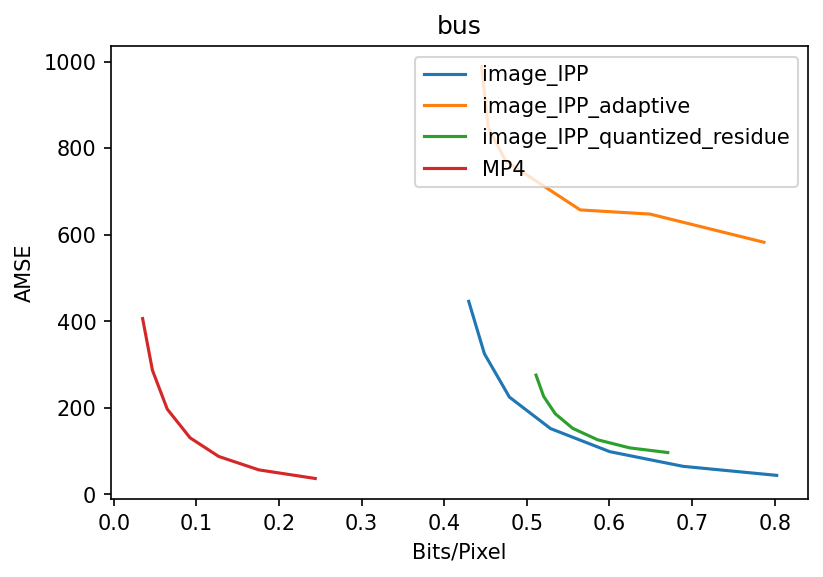

In [44]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

## Ignore the rest

In [45]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

NameError: name 'RD_points_no_intrablocks' is not defined

<Figure size 900x600 with 0 Axes>